# 1) Cargamos los datos 📕

In [63]:
import pandas as pd
data = pd.read_csv("data/ohe_customer_dataset.csv", sep=",")

In [64]:
##### **Aclaración:** Podrían analizar todas las columnas, pero en este caso nos parece relevante solo analizar algunas columnas:
filter_data = data[["orderState_failed", "orderState_fulfilled", "orderState_pending", "transactionFailed", "fraudulent", "customerIPAddressSimplified_digits_and_letters"]].copy()

filter_data.head(50)

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters
0,0,0,1,False,0,0
1,0,1,0,False,1,0
2,0,1,0,False,0,1
3,0,1,0,False,0,1
4,0,1,0,True,1,0
5,1,0,0,False,1,0
6,0,1,0,True,1,0
7,0,1,0,False,1,0
8,0,1,0,True,0,1
9,0,1,0,False,1,0


# 4) Clustering con K-Means 🎯
### Haremos todo el análisis para el dataframe `filter_data`
## 4.2) Creación del modelo

In [65]:
# Normalizar los datos
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,5.702590e-18,4.562072e-17,-2.281036e-17,4.847202e-17,-9.124144e-17,-2.281036e-17
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-2.953981e-01,-1.339299e+00,-2.169305e-01,-6.076436e-01,-2.028993e+00,-3.755338e-01
25%,-2.953981e-01,-1.339299e+00,-2.169305e-01,-6.076436e-01,-7.271779e-01,-3.755338e-01
50%,-2.953981e-01,7.466592e-01,-2.169305e-01,-6.076436e-01,5.746377e-01,-3.755338e-01
75%,-2.953981e-01,7.466592e-01,-2.169305e-01,1.645701e+00,5.746377e-01,-3.755338e-01
max,3.385262e+00,7.466592e-01,4.609772e+00,1.645701e+00,5.746377e-01,2.662876e+00


In [66]:
# Crear Modelo
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [67]:
pred_cl = cl_model.predict(x_data_norm)

In [68]:
# Número de cluster: 
pred_cl

array([0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [69]:
cl_model

KMeans(max_iter=100, n_clusters=3, random_state=0)

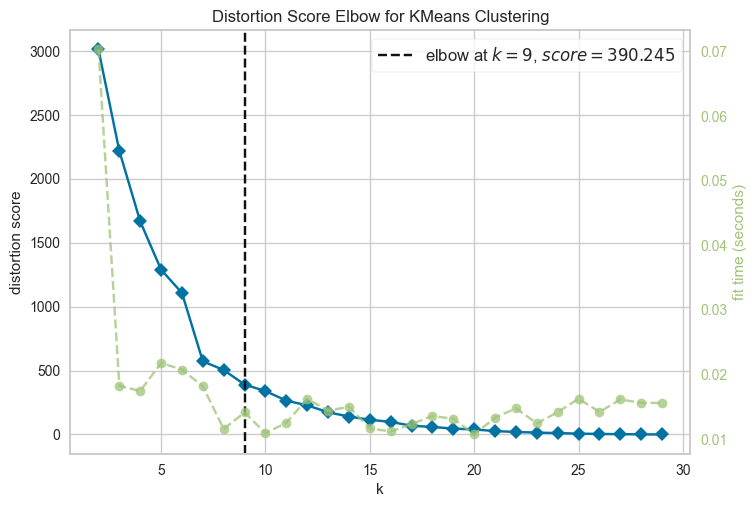

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=29, random_state=0),
                 k=(2, 30))

In [70]:
from copy import deepcopy
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

## 4.4) Analizando el modelo final: 'Gráfico de coordenadas'
### Hacemos copia de los datos y le agregamos el cluster:

In [71]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados
x_data_cl.head(50)

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0,0,1,False,0,0,0
1,0,1,0,False,1,0,0
2,0,1,0,False,0,1,2
3,0,1,0,False,0,1,2
4,0,1,0,True,1,0,0
5,1,0,0,False,1,0,1
6,0,1,0,True,1,0,0
7,0,1,0,False,1,0,0
8,0,1,0,True,0,1,2
9,0,1,0,False,1,0,0


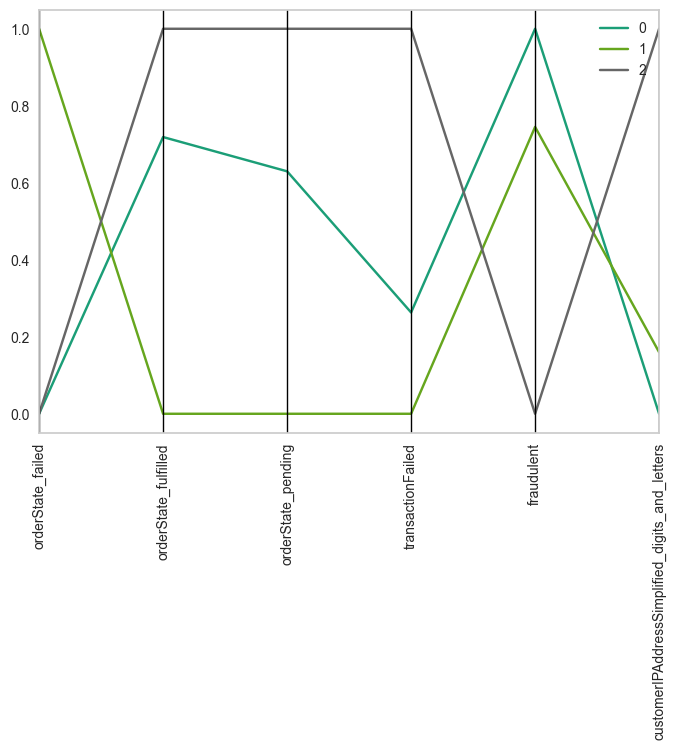

In [72]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [73]:
d_orig.head(3)

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.0,0.666667,0.045635,0.267857,1.748016,0.00,0
1,1.0,0.000000,0.000000,0.260000,1.380000,0.16,1
2,0.0,0.927536,0.072464,0.289855,0.304348,1.00,2


In [74]:
d_transf.head(3)

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0.0,0.71875,0.629762,0.263176,1.000000,0.00,0
1,1.0,0.00000,0.000000,0.000000,0.745083,0.16,1
2,0.0,1.00000,1.000000,1.000000,0.000000,1.00,2


### Algunos insights 

#### 1 - El cluster 2 es donde se agrupan en mayor proporción las transacciones donde no hubo fraude. 
##### 1.1 - El "orderState" de estas transacciones es no fallido.
##### 1.2 - Las ip con numeros y letras, en general, no participan en transacciones fraudulentas.

#### 2 - Cluster 1
##### 2.1 - Tiene sentido que, al ser un agrupamamiento de transacciones, donde tienen el "orderState" failed, que parte de estas txs sean fraudulentas.
##### 2.2 - En estas txs, hay un proporción menor de ips que no son solo números y letras.

#### 3 - Cluster 0
##### 3.1 - En este cluster se agrupan más txs fraudulentas
##### 3.2 - Esta bien que hay un "orderState" en fullfilled con aprox. 0,8. Para que la tx sea fraudulenta, la misma debe ocurrir. 
##### 3.3 - Tambien hay txs que fallan, lo cual, tiene sentido si en este grupo hay mas txs fraudulentas. Es decir, al haber mayor proporción de txs fraudulenta en este grupo, tiene sentido que tambien aumente la proporción de txs paradas. El sistema que las procesa, probablemente, detenga alguna de estas txs antes de procesarlas o algo así.
##### 3.4 - Claramente, las ip verifican no ser simplemente números y letras. Lo cual, esta de acuerdo con lo mencionado sobre los otros clusteres.


## Bonus: Scatter 3D!

In [75]:
import plotly.express as px

fig = px.scatter_3d(filter_data, x='orderState_failed', y='customerIPAddressSimplified_digits_and_letters', z='transactionFailed', color='fraudulent')
fig.show()

#!pip3 install hdbscan
#import hdbscan
# Debido al crash lo hice en Colab
# Tambien tuve mis inconvenientes hasta que... magia!
# https://colab.research.google.com/drive/1T_L_WrmhY7iXVv69N1mlP3jkVvFxK6uR?usp=sharing

# 5) Clustering con HDBSCAN 🤖
## 5.2) Tuning/regularización de HDBSCAN para menos clusters

In [76]:
import hdbscan

In [77]:
# `min_cluster_size=15`
model_hdb = hdbscan.HDBSCAN(min_cluster_size=15).fit(filter_data)

## 5.3) Análisis del modelo cluster (profiling)

In [78]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb.labels_ # ojo aca! el predict es de los datos normalizados
x_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,transactionFailed,fraudulent,customerIPAddressSimplified_digits_and_letters,cluster
0,0,0,1,False,0,0,-1
1,0,1,0,False,1,0,5
2,0,1,0,False,0,1,4
3,0,1,0,False,0,1,4
4,0,1,0,True,1,0,-1


In [79]:
x_data_cl['cluster'].value_counts()

cluster
 6    196
 8    105
-1     94
 2     67
 3     41
 4     30
 1     27
 5     24
 7     23
 0     16
Name: count, dtype: int64

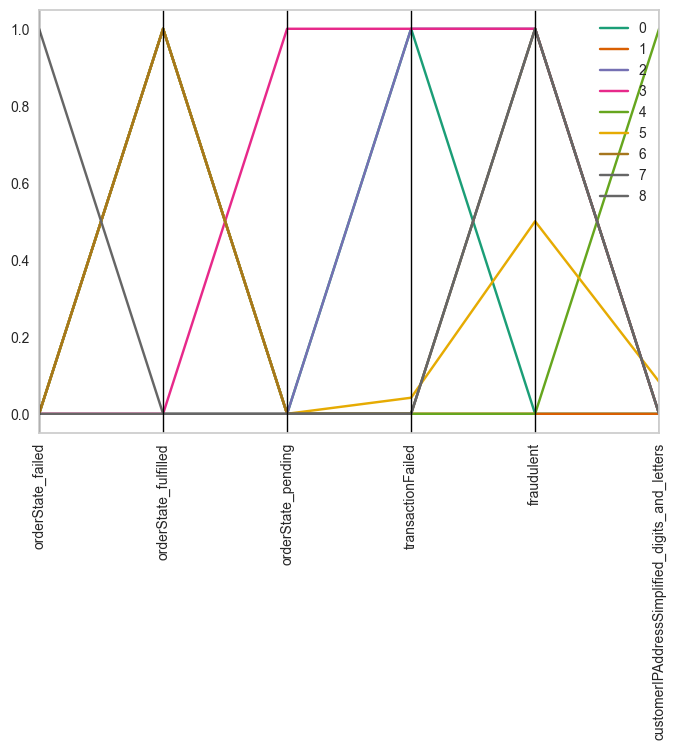

In [80]:
# Sacamos el cluster de ruido
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

#### 1 - Muchas líneas, no es simple la lectrua de este gráfico
#### 2 - Pareciera haber un agrupamiento entre txs con fraude, con IPs no simples y txs que son procesadas, osea, txs que no fallan.
#### 3 - Pareciera que las txs con orderState_pending tienden a fallar. Ahora, si estas txs fallan, como es que indica fraude tmb. No me queda claro. 
#### 4 - Complementario, cuando orderState esta fullfiled, no pareciera agruparse con txs fraudulentas
#### 5 - El cluster 5 es similar al cluster 2 del g´rafico obtenido antes. No tiene los mismos números pero el comportamiento de las lineas se corresponden.